# Content
starwars-episode-N-interactions.json contains the social network extracted from Episode N, where the links between characters are defined by the times the characters speak within the same scene.

## Nodes

**name:** Name of the character  
**value:** Number of scenes the character appeared in  
**colour:** Colour in the visualization  

## Links represent connections between characters  

**source:** zero-based index of the character that is one end of the link, the order of nodes is the order in which they are listed in the “nodes” element  
**target:** zero-based index of the character that is the the other end of the link.  
**value:** Number of scenes where the “source character” and “target character” of the link appeared together.  

The network is undirected and which character represents the source and the target is arbitrary, they correspond only to two ends of the link.


**More infomration about the dataset**
-   [Kaggle: Star Wars Social Network](https://www.kaggle.com/ruchi798/star-wars)


# Import relevant libraries

In [1]:
import os
import glob
import json
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from networkx.algorithms import degree_centrality
from networkx.algorithms import eigenvector_centrality
from networkx.algorithms import betweenness_centrality
from community_detection.data_preprocessing import load_starwars_graph

# Network exploration

## Load data

In [2]:
# setup data path
base_path = os.path.join('..', 'datasets')
file_path = os.path.join(base_path, 'starwars-full-interactions.json')

with open(file_path) as json_file:
    data = json.load(json_file)

In [3]:
nodes = data['nodes']
edges = data['links']

In [4]:
df_nodes = pd.DataFrame(nodes)
df_nodes.sort_values(by = 'value', ascending = False).head(10)

,name,value,colour
70,HAN,169,#ff9400
64,LUKE,160,#3881e5
21,C-3PO,150,#FFD700
4,OBI-WAN,147,#48D1CC
17,ANAKIN,131,#ce3b59
67,LEIA,98,#DCDCDC
14,PADME,74,#DDA0DD
94,FINN,63,#07b19f
0,QUI-GON,61,#4f4fb1
63,DARTH VADER,58,#000000


In [5]:
df_edges = pd.DataFrame(edges)
df_edges.head()

,source,target,value
0,1,0,1
1,2,3,1
2,4,3,1
3,0,3,1
4,4,0,26


In [6]:
G = load_starwars_graph()

Name: Star-Wars
Type: Graph
Number of nodes: 110
Number of edges: 398
Average degree:   7.2364


## Visualization

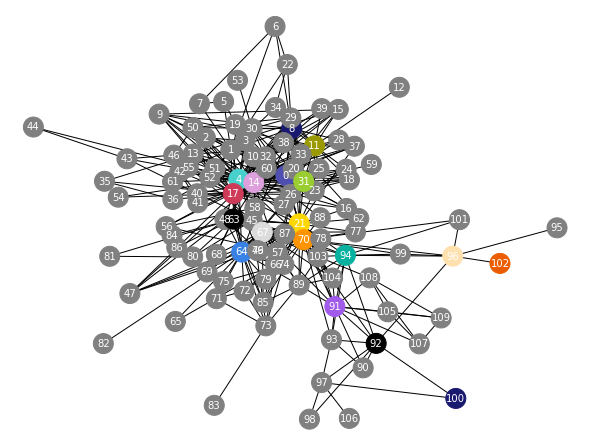

In [7]:
# plot decoration
# map the color of each node with its community
colors = list(df_nodes.colour)
color_map = []
# loop over nodes in G
for node in G:
    color_map.append(colors[node])

options = {
    'node_color': color_map,
    'node_size': 400,
    'alpha': 1,
    'width': 1,
    'with_labels': True,
    'font_size': 10,
    'font_color': 'white'}

# set graph pattern
pos = nx.kamada_kawai_layout(G)
    
#set graph size
plt.figure(figsize=(8, 6)) 

# draw the network
nx.draw(G, pos, **options)

In [8]:
# degree
degree = degree_centrality(G)

# eigenvector_centrality
ec = eigenvector_centrality(G)

# betweeness centrality
bc = betweenness_centrality(G)

,degree,eigenvector_centrality,betweenness_centrality
degree,1.000000,0.916554,0.852981
eigenvector_centrality,0.916554,1.000000,0.676867
betweenness_centrality,0.852981,0.676867,1.000000


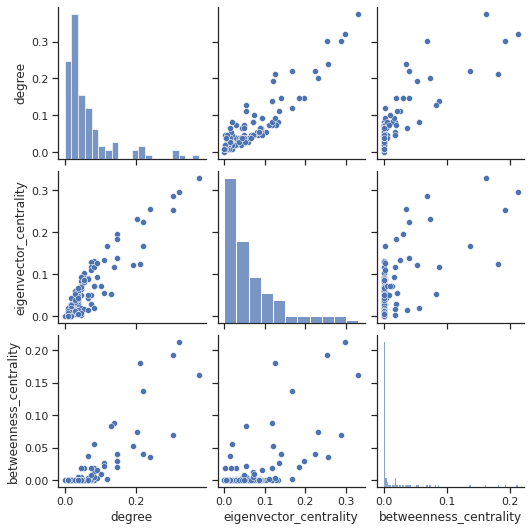

In [9]:
# visualize results
df = pd.DataFrame({'degree': degree, 'eigenvector_centrality': ec,
                   'betweenness_centrality': bc})

#scatter plot matrix
# visualization options
sns.set_theme(style="ticks")

sns.pairplot(df)

# correlation matrix
df.corr()

In [10]:
# merge the table
merged_df = pd.merge(df_nodes, df, left_index = True, right_index = True)
merged_df.head(30)

,name,value,colour,degree,eigenvector_centrality,betweenness_centrality
0,QUI-GON,61,#4f4fb1,0.238532,0.255767,0.036212
1,NUTE GUNRAY,24,#808080,0.146789,0.139163,0.040897
2,PK-4,3,#808080,0.018349,0.023463,0.000000
3,TC-14,4,#808080,0.045872,0.049392,0.005642
4,OBI-WAN,147,#48D1CC,0.321101,0.296814,0.212897
5,DOFINE,3,#808080,0.027523,0.013608,0.000142
6,RUNE,10,#808080,0.036697,0.027948,0.001696
7,TEY HOW,4,#808080,0.027523,0.012247,0.000085
8,EMPEROR,51,#191970,0.201835,0.231125,0.074333
9,CAPTAIN PANAKA,19,#808080,0.082569,0.131763,0.000313


# Summarize by episode

## Load data

In [11]:
# setup data path
base_path = os.path.join('..', 'datasets')
files_path = glob.glob(os.path.join(base_path, '*.json'))
files_path

['../datasets/starwars-episode-1-interactions.json',
 '../datasets/starwars-episode-2-interactions.json',
 '../datasets/starwars-episode-3-interactions.json',
 '../datasets/starwars-episode-4-interactions.json',
 '../datasets/starwars-episode-5-interactions.json',
 '../datasets/starwars-episode-6-interactions.json',
 '../datasets/starwars-episode-7-interactions.json',
 '../datasets/starwars-full-interactions.json']

In [12]:
# load files by episode excluding the full-interactions file
for i in range(len(files_path) - 1):
    with open(files_path[i]) as json_file:
        var_name = '_'.join(['ep', str(i+1)])
        vars()[var_name] = json.load(json_file)
        print('A variable `{}` was created!'.format(var_name))

# load full interaction file to get all characters info
with open(files_path[-1]) as json_file:
    base = json.load(json_file)
    print('A variable `base` was created!')

A variable `ep_1` was created!
A variable `ep_2` was created!
A variable `ep_3` was created!
A variable `ep_4` was created!
A variable `ep_5` was created!
A variable `ep_6` was created!
A variable `ep_7` was created!
A variable `base` was created!


## Create summary table

In [13]:
# generate a table with all character as a base table for the summary
sum_table = pd.DataFrame(base['nodes'])[['name']]
sum_table.head()

,name
0,QUI-GON
1,NUTE GUNRAY
2,PK-4
3,TC-14
4,OBI-WAN


In [14]:
# create a list of episodes
ep_list = ['ep_1', 'ep_2', 'ep_3', 'ep_4', 'ep_5', 'ep_6', 'ep_7']

# loops over the list to merge information whether a character appears in each episode to the summary table
for ep in ep_list:
    # create a dataframe(`df`) from `nodes` element in each episode's dictionary
    df = pd.DataFrame(vars()[ep]['nodes'])
    # subset only the `name` column
    df = df[['name']]
    # create a new column with a name corresponding to its episode with a value 1 in each row
    df.loc[:, ep] = 1
    # merge the newly created dataframe to the summary table
    sum_table = pd.merge(sum_table, df, on = 'name', how = 'left')
    print('{} information was added to the summary table'.format(ep))

# fill NAN with 0
sum_table.fillna(0, inplace = True)

ep_1 information was added to the summary table
ep_2 information was added to the summary table
ep_3 information was added to the summary table
ep_4 information was added to the summary table
ep_5 information was added to the summary table
ep_6 information was added to the summary table
ep_7 information was added to the summary table


In [15]:
sum_table.head()

,name,ep_1,ep_2,ep_3,ep_4,ep_5,ep_6,ep_7
0,QUI-GON,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,NUTE GUNRAY,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,PK-4,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,TC-14,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OBI-WAN,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [16]:
print(tabulate(sum_table, headers='keys', tablefmt='pipe'))

|     | name                 |   ep_1 |   ep_2 |   ep_3 |   ep_4 |   ep_5 |   ep_6 |   ep_7 |
|----:|:---------------------|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|   0 | QUI-GON              |      1 |      0 |      1 |      0 |      0 |      0 |      0 |
|   1 | NUTE GUNRAY          |      1 |      1 |      1 |      0 |      0 |      0 |      0 |
|   2 | PK-4                 |      1 |      1 |      0 |      0 |      0 |      0 |      0 |
|   3 | TC-14                |      1 |      0 |      0 |      0 |      0 |      0 |      0 |
|   4 | OBI-WAN              |      1 |      1 |      1 |      1 |      1 |      1 |      0 |
|   5 | DOFINE               |      1 |      0 |      0 |      0 |      0 |      0 |      0 |
|   6 | RUNE                 |      1 |      0 |      0 |      0 |      0 |      0 |      0 |
|   7 | TEY HOW              |      1 |      0 |      0 |      0 |      0 |      0 |      0 |
|   8 | EMPEROR              |      1 |      1 |      1 |   